In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
df = pd.read_csv('all.csv')
df =  df.drop(['All','O+','O-','B-','A+','A-','AB+','AB-'], axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,B+
Date,
2017-01-01,17
2017-01-02,4
2017-01-03,25
2017-01-04,23
2017-01-05,20


In [3]:
df.head()

,B+
Date,
2017-01-01,17
2017-01-02,4
2017-01-03,25
2017-01-04,23
2017-01-05,20


In [4]:
train, test = df[:-4], df[-4:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
182/182 [==============================] - 4s 22ms/step - loss: 0.0378
Epoch 2/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0307
Epoch 3/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0303
Epoch 4/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0298
Epoch 5/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0294
Epoch 6/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0297
Epoch 7/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0301
Epoch 8/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0299
Epoch 9/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0297
Epoch 10/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0298
Epoch 11/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0302
Epoch 12/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0296
E

182/182 [==============================] - 2s 10ms/step - loss: 0.0288
Epoch 99/180
182/182 [==============================] - 2s 11ms/step - loss: 0.0288
Epoch 100/180
182/182 [==============================] - 3s 16ms/step - loss: 0.0290
Epoch 101/180
182/182 [==============================] - 3s 14ms/step - loss: 0.0289
Epoch 102/180
182/182 [==============================] - 2s 12ms/step - loss: 0.0288
Epoch 103/180
182/182 [==============================] - 3s 14ms/step - loss: 0.0289
Epoch 104/180
182/182 [==============================] - 2s 13ms/step - loss: 0.0286
Epoch 105/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0289
Epoch 106/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0289
Epoch 107/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0288
Epoch 108/180
182/182 [==============================] - 2s 10ms/step - loss: 0.0287
Epoch 109/180
182/182 [==============================] - 2s 11ms/step - loss: 0.

In [8]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [9]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

#df.reset_index(inplace=True)
#df_predict.reset_index(inplace=True)
#df_predict.head(3)

,Prediction
Date,
2020-01-01,16.454319
2020-01-02,16.104267
2020-01-03,16.034127
2020-01-04,16.424399


In [10]:
df.head(12)

,B+
Date,
2017-01-01,17
2017-01-02,4
2017-01-03,25
2017-01-04,23
2017-01-05,20
2017-01-06,28
2017-01-07,13
2017-01-08,24
2017-01-09,19


In [11]:
df_test = pd.concat([df,df_predict], axis=1)

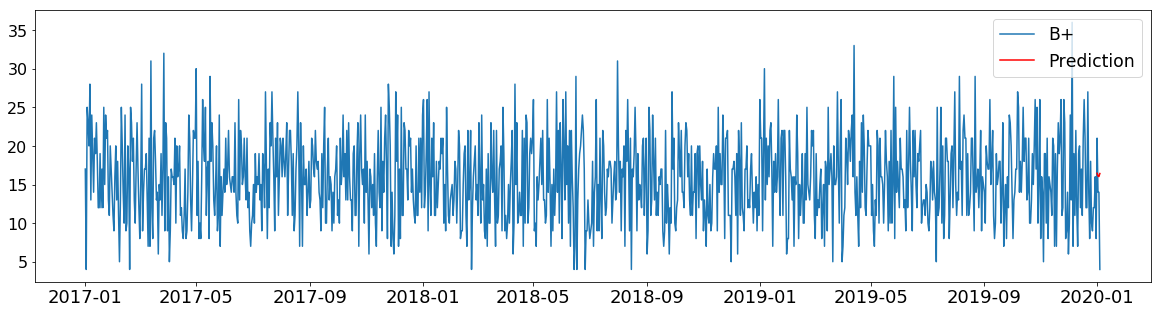

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['B+'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [13]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [6.77485294]


In [14]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0287
Epoch 2/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0288
Epoch 3/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0286
Epoch 4/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0288
Epoch 5/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0289
Epoch 6/180
183/183 [==============================] - 2s 11ms/step - loss: 0.0287
Epoch 7/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0287
Epoch 8/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0287
Epoch 9/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0288
Epoch 10/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0287
Epoch 11/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0287
Epoch 12/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0287
E

183/183 [==============================] - 2s 9ms/step - loss: 0.0282
Epoch 99/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0280
Epoch 100/180
183/183 [==============================] - 2s 8ms/step - loss: 0.0279
Epoch 101/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0278
Epoch 102/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0280
Epoch 103/180
183/183 [==============================] - 1s 8ms/step - loss: 0.0279
Epoch 104/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0282
Epoch 105/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0280
Epoch 106/180
183/183 [==============================] - 2s 10ms/step - loss: 0.0279
Epoch 107/180
183/183 [==============================] - 2s 9ms/step - loss: 0.0279
Epoch 108/180
183/183 [==============================] - 2s 12ms/step - loss: 0.0278
Epoch 109/180
183/183 [==============================] - 3s 16ms/step - loss: 0.0281
Epo

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,B+
2020-01-11,NaN
2020-01-18,NaN
2020-01-25,NaN
2020-02-01,NaN


In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


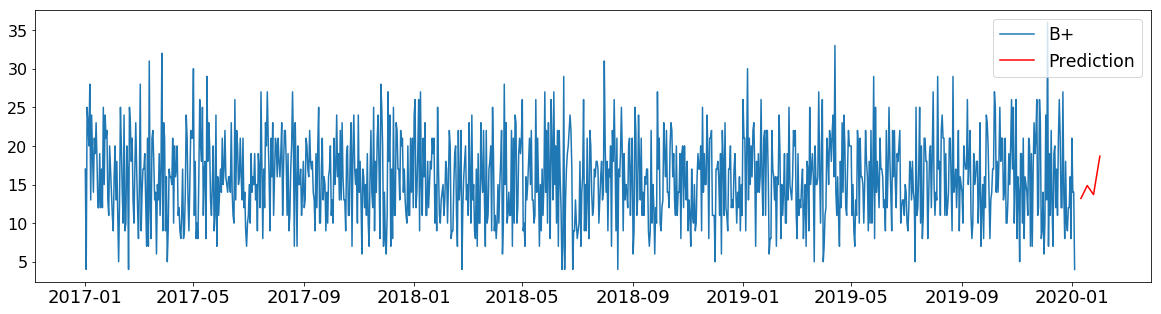

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['B+'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [18]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

              B+  Prediction
Date                        
2017-01-01  17.0         NaN
2017-01-02   4.0         NaN
2017-01-03  25.0         NaN
2017-01-04  23.0         NaN
2017-01-05  20.0         NaN
2017-01-06  28.0         NaN
2017-01-07  13.0         NaN
2017-01-08  24.0         NaN
2017-01-09  19.0         NaN
2017-01-10  14.0         NaN
2017-01-11  21.0         NaN
2017-01-12  19.0         NaN
2017-01-13  23.0         NaN
2017-01-14  18.0         NaN
2017-01-15  12.0         NaN
2017-01-16  12.0         NaN
2017-01-17  19.0         NaN
2017-01-18  12.0         NaN
2017-01-19  17.0         NaN
2017-01-20  12.0         NaN
2017-01-21  25.0         NaN
2017-01-22  15.0         NaN
2017-01-23  24.0         NaN
2017-01-24  21.0         NaN
2017-01-25  22.0         NaN
2017-01-26  13.0         NaN
2017-01-27  11.0         NaN
2017-01-28  20.0         NaN
2017-01-29  17.0         NaN
2017-01-30  14.0         NaN
...          ...         ...
2019-12-10  12.0         NaN
2019-12-11   7

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-14 00:00:00'),
 Timestamp('2017-01-15 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-21 00:00:00'),
 Timestamp('2017-01-22 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-28 00:00:00'),
 Timestamp('2017-01-

In [19]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-12-26',
 '2019-12-27',
 '2019-12-28',
 '2019-12-29',
 '2019-12-30',
 '2019-12-31',
 '2020-01-01',
 '2020-01-02',
 '2020-01-03',
 '2020-01-04',
 '2020-01-11',
 '2020-01-18',
 '2020-01-25',
 '2020-02-01']

In [20]:
import pickle
pickle.dump(model, open('LSTMTS.pkl','wb'))

In [21]:
model1 = pickle.load(open('LSTMTS.pkl','rb'))
print(df_predict)
#print(model.predict([[294.4631853,269.2113163,259.0677778,801.762786,10,857728.9379,2.31E+08,6.45E+07,-1.58E-04,0.318021887,0.944691378,911.1851229,115.1132337,38754.36871,125.6205738,795.0629418,769.0343165,758.783161,802.5212002,105.7078282,109.0908925,38192.10039,99.75624612,0,0,0.739668222,0.795160951,0.39753938]]))
#print(model.score(X_test,y_test))

            Prediction
2020-01-11   13.188398
2020-01-18   14.865112
2020-01-25   13.695009
2020-02-01   18.673002


In [22]:
import joblib

joblib.dump(scaler, "B+data_transformer.joblib")
model.save("B+model.h5")

In [23]:
from datetime import timedelta, date
EndDate = date.today() + timedelta(days=7)
